In [1]:
import csv
import numpy as np
from collections import Counter

In [2]:
file = 'icml_face_data.csv'

EMOTION = 'emotion'
USAGE = ' Usage'
PIXELS = ' pixels'

PRIVATE_TEST = 'PrivateTest'
PUBLIC_TEST = 'PublicTest'
TRAINING = 'Training'

In [3]:
f = open(file, 'r')

In [4]:
reader = csv.DictReader(f)

In [5]:
labels = []
usages = []
pixels = []


In [6]:
for row in reader:
    labels.append(int(row[EMOTION]))
    usages.append(row[USAGE])
    pixels.append(list(map(int,row[PIXELS].split())))

In [7]:
set(usages)

{'PrivateTest', 'PublicTest', 'Training'}

In [8]:
np.shape(pixels)

(35887, 2304)

In [9]:
Counter(usages)

Counter({'Training': 28709, 'PublicTest': 3589, 'PrivateTest': 3589})

In [10]:
train_data = []
train_label = []

validation_data = []
validation_label = []

testing_data = []
testing_label = []

In [11]:
for i in range(len(labels)):
    if usages[i] == TRAINING :
        train_data.append(pixels[i])
        train_label.append(labels[i])
    elif usages[i] == PRIVATE_TEST :
        validation_data.append(pixels[i])
        validation_label.append(labels[i])
    else:
        testing_data.append(pixels[i])
        testing_label.append(labels[i])

In [12]:
np.shape(train_data)

(28709, 2304)

In [13]:
train_data = np.array(train_data)
train_label = np.array(train_label)

validation_data = np.array(validation_data)
validation_label = np.array(validation_label)

testing_data = np.array(testing_data)
testing_label = np.array(testing_label)

In [14]:
train_data = np.reshape(train_data, [len(train_data), 48, 48, 1])
validation_data = np.reshape(validation_data, [len(validation_data), 48, 48, 1])
testing_data = np.reshape(testing_data, [len(testing_data), 48, 48, 1])

In [15]:
np.shape(train_data)

(28709, 48, 48, 1)

In [16]:
np.shape(validation_data)

(3589, 48, 48, 1)

In [17]:
np.shape(testing_data)

(3589, 48, 48, 1)

In [18]:
np.save('train_data.npy', train_data)
np.save('train_label.npy', train_label)

np.save('validation_data.npy', validation_data)
np.save('validation_label.npy', validation_label)

np.save('testing_data.npy', testing_data)
np.save('testing_label.npy', testing_label)

In [19]:
validation_label

array([0, 5, 6, ..., 0, 3, 2])

In [20]:
testing_label

array([0, 1, 4, ..., 4, 4, 4])

In [34]:
img = train_data[100]

In [35]:
img = np.reshape(img,[48,48])

In [36]:
img = np.stack([img,img,img]. axis=2)

SyntaxError: keyword can't be an expression (<ipython-input-36-a60b9c51f71e>, line 1)

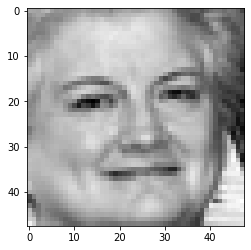

In [37]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')

In [38]:
train_label[100]

3

In [39]:
28709+3589+3589

35887